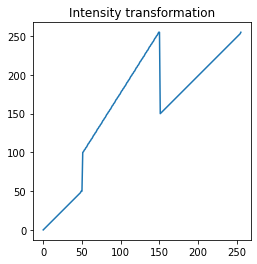

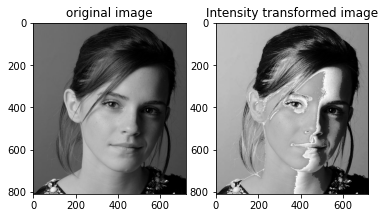

In [6]:
%matplotlib inline
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

im=cv.imread(r'Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)

t1=np.linspace(0,50,50)
t2=np.linspace(50,100,1)
t3=np.linspace(100,255,99)
t4=np.linspace(255,150,1)
t5=np.linspace(150,255,105)
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(t)
ax.title.set_text("Intensity transformation")
ax.set_aspect('equal')
assert len(t)==256

g=cv.LUT(im,t)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',im)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

f,ax=plt.subplots(1,2)                    

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("original image")
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("Intensity transformed image")
plt.show()

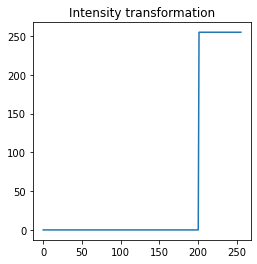

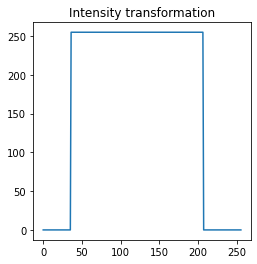

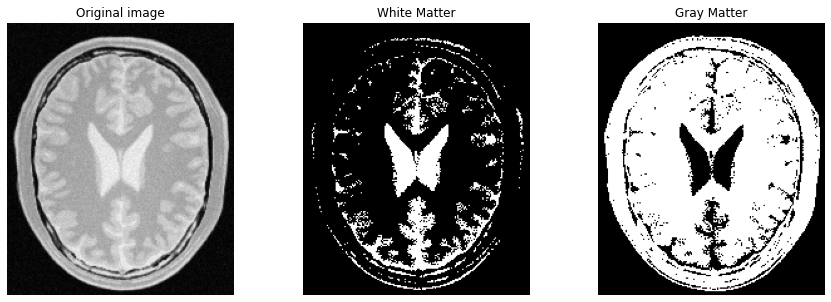

In [9]:
%matplotlib inline
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

im=cv.imread(r'Images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

#Extracting White Matters

t1=np.linspace(0,0,200)
t2=np.linspace(0,255,1)
t3=np.linspace(255,255,55)
tw=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(tw)
ax.title.set_text("Intensity transformation")
ax.set_aspect('equal')
assert len(tw)==256

gw=cv.LUT(im,tw)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',im)
cv.waitKey(0)
cv.imshow('Image',gw)
cv.waitKey(0)
cv.destroyAllWindows()

#Extracting Gray Matters
t3=np.linspace(0,0,35)
t4=np.linspace(0,255,1)
t5=np.linspace(255,255,170)
t6=np.linspace(255,0,1)
t7=np.linspace(0,0,49)
tg=np.concatenate((t3,t4,t5,t6,t7),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(tg)
ax.title.set_text("Intensity transformation")
ax.set_aspect('equal')
assert len(tg)==256

gg=cv.LUT(im,tg)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',im)
cv.waitKey(0)
cv.imshow('Image',gg)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(1,3,sharex='all',sharey='all',figsize=(15,5))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(gw, cv.COLOR_BGR2RGB))
ax[1].set_title("White Matter")
ax[2].imshow(cv.cvtColor(gg, cv.COLOR_BGR2RGB))
ax[2].set_title("Gray Matter")
for i in range(3):
    ax[i].axis('off')
plt.show()

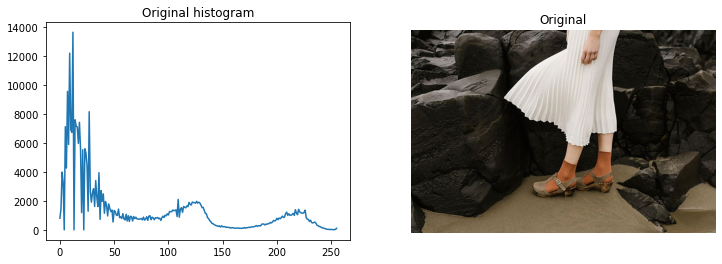

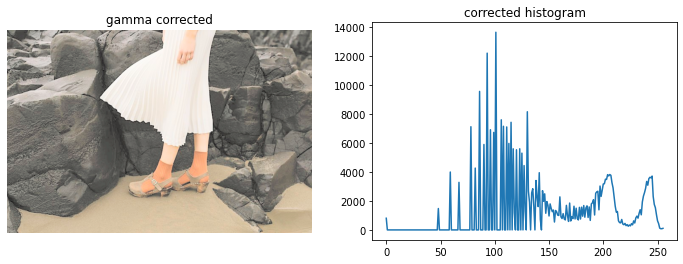

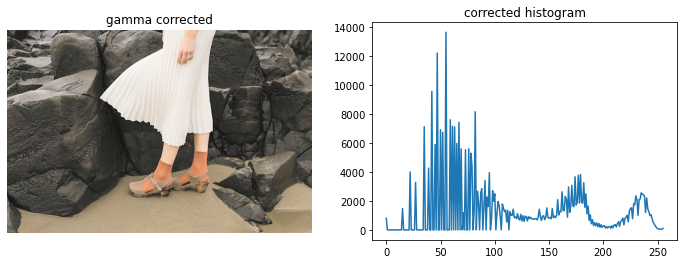

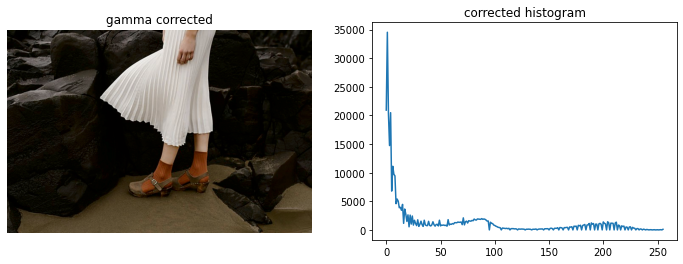

In [19]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

imgRgb=cv.imread('Images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert imgRgb is not None

Lab=cv.cvtColor(imgRgb,cv.COLOR_BGR2LAB)
l,a,b=cv.split(Lab)

hist_Lab=cv.calcHist([Lab],[0],None,[256],[0,256])

cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',imgRgb)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(hist_Lab)
ax[0].set_title('Original histogram')
ax[1].imshow(cv.cvtColor(imgRgb,cv.COLOR_BGR2RGB))
ax[1].set_title("Original")
ax[1].axis('off')
plt.show()

gamma=[0.3,0.5,1.5]
for gam in gamma:
    t= np.array([(p/255)**gam*255 for p in range(0,256)]).astype(np.uint8)
    newL=cv.LUT(l,t)
    labNew=cv.merge([newL,a,b])
    imgNew=cv.cvtColor(labNew,cv.COLOR_LAB2BGR)
    hist_Lab=cv.calcHist([labNew],[0],None,[256],[0,256])

    cv.namedWindow('image',cv.WINDOW_AUTOSIZE)
    cv.imshow('image',imgNew)
    cv.waitKey(0)
    cv.destroyAllWindows()

    fig,ax=plt.subplots(1,2,figsize=(12,4))
    ax[0].imshow(cv.cvtColor(imgNew,cv.COLOR_BGR2RGB))
    ax[0].set_title("gamma corrected")
    ax[0].axis('off')
    ax[1].plot(hist_Lab)
    ax[1].set_title('corrected histogram')
    plt.show()
    


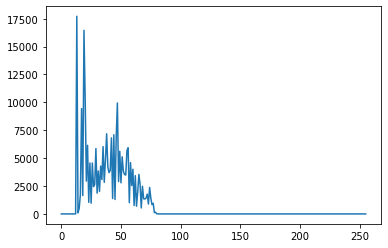

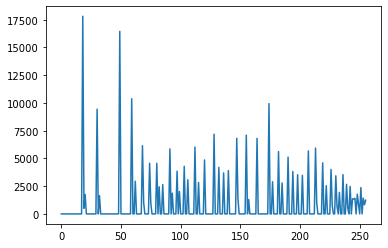

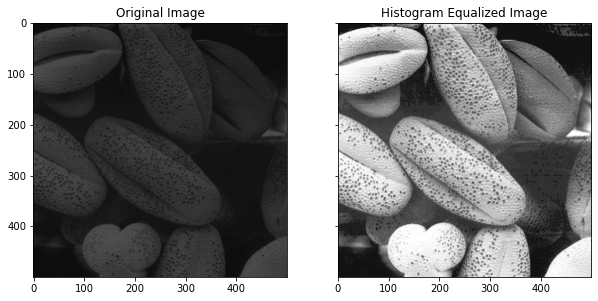

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('Images/shells.png',cv.IMREAD_GRAYSCALE)
img_flatten=img.flatten()
#print(np.shape(img_flatten))
#histogram
def histogram(image,length):
    indexes=np.linspace(0,255,256).reshape(256,1).astype(int)
    pixels=np.append(indexes,np.zeros((256,1)),axis=1).astype(int)
    for j in range(length):
        pixels[int(image[j]),1]+=1 #increase the count when perticular color pixel detected
    plt.figure()
    plt.plot(pixels[:,0],pixels[:,1])
    plt.show()

#histogram equalization
def histogram_equalization(image,length):
    indexes=np.linspace(0,255,256).reshape(256,1).astype(int)
    pixels=np.append(indexes,np.zeros((256,1)).astype(int),axis=1).astype(int)
    for j in range(length):
        pixels[int(image[j]),1]+=1 #increase the count when perticular color pixel detected
    
    #cumulation
    sum=0
    for i in range(256):
        sum+=pixels[i,1]
        pixels[i,1]=sum
        pixels[i,1]=round(pixels[i,1]*255/length)
    histogram_image=np.zeros((1,length)).astype(np.uint8)
    for i in range(length):
        histogram_image[0,i]=pixels[image[i],1]
    new_image=histogram_image[0,:]
    return new_image

length=np.shape(img_flatten)[0]
histogram(img_flatten,length)#histogram of the original image
hist_equal_img=histogram_equalization(img_flatten,length)
histogram(hist_equal_img,length) #plot histogram equalized image

histEqualImage=hist_equal_img.reshape(500,500)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('image',histEqualImage)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(10,10))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(histEqualImage,cv.COLOR_BGR2RGB))
ax[1].set_title('Histogram Equalized Image')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#Nearest Neighbour
image=cv.imread()

#Bilinear Interpolation